# Wk2_Notebook (Additional NumPy and pandas)

In this notebook, I will discuss many functionalities of the NumPy and (in particular) pandas libraries, but I will especially focus on functionalities that are widely used for data analytics purposes. More specifically, the following topics will be discussed:
- [Importing tabular data into pandas](#Wk2_a)
- [Selecting and organizing data](#Wk2_b)
- [Modifying and/or extending a DataFrame](#Wk2_c)
- [Identifying and dealing with missing values](#Wk2_d)
- [Applying custom functions](#Wk2_e)
- [Groupby operations: split-apply-combine](#Wk2_f)
- [Combining DataFrames](#Wk2_g)
- [Reshaping and pivoting a DataFrame](#Wk2_h)

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing tabular data into pandas <a name="Wk2_a"></a>

### Importing CSV files with pandas

The `read_csv()` method of the pandas library can be used to read a comma separated values (CSV) file and load it into memory as a pandas DataFrame. This method has many useful options (parameters), including:
- sep : str, default ‘,’.
- skiprows : list-like, int or callable, optional.
- skipfooter : int, default 0.

In [2]:
# Example of importing a CSV file

df = pd.read_csv('data/example_1.csv')
df

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,39.2
3,Microsoft Corp,MSFT,2020,44.3
4,Amazon.com Inc.,AMZN,2019,11.6
5,Amazon.com Inc.,AMZN,2020,21.3


Similarly, the `to_csv()` method can be used to write the contents of a pandas DataFrame to a comma separated values (CSV) file. This method has also many useful options (parameters), including:
- index : bool, default True.

In [3]:
# Write to the CSV file

#df.to_csv('data/example_1.csv', index=False)

### Importing Excel files with pandas

The `read_excel()` method of the pandas library can be used to read an Excel file and load it into memory as a pandas DataFrame. This method has many useful options (parameters), including:
- sheet_name : str, int, list, or None, default 0.
- usecols : int, str, list-like, or callable default None.
- skiprows : list-like, int or callable, optional.
- skipfooter : int, default 0.

In [4]:
# Example of importing an Excel file

df = pd.read_excel('data/example_1.xlsx')
df

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,39.2
3,Microsoft Corp,MSFT,2020,44.3
4,Amazon.com Inc.,AMZN,2019,11.6
5,Amazon.com Inc.,AMZN,2020,21.3


Similarly, the `to_excel()` method can be used to write the contents of a pandas DataFrame to an Excel file. This method has also many useful options (parameters), including:
- index : bool, default True.

In [5]:
# Write to the Excel file

#df.to_excel('data/example_1.xlsx', index=False)

### Importing HTML tables from websites with pandas

The `read_html()` method is a convenient way to turn an HTML table into a pandas DataFrame. This method can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site's HTML. There can be some challenges in cleaning and formatting the data before analyzing it, however. \(In case you ever need it: See, for example, https://pbpython.com/pandas-html-table.html for an excellent discussion of how to deal with such challenges.\) Here I just show a simple example, in which I incorporate tables from the following website: https://en.wikipedia.org/wiki/AEX_index.

In [6]:
# Import the HTML table

table_AEX = pd.read_html('https://en.wikipedia.org/wiki/AEX_index')

#df_aex = table_AEX[0]
df_aex = table_AEX[1]
#df_aex = table_AEX[2]
df_aex

,Year,Closing level,Change in index in points,Change in index in %
0,1983,73.21,NaN,NaN
1,1984,85.75,12.54,17.13
2,1985,121.50,35.75,41.69
3,1986,114.69,−6.81,−5.60
4,1987,77.87,−36.82,−32.10
5,1988,117.68,39.81,51.12
6,1989,136.59,18.91,16.07
7,1990,104.01,−32.58,−23.85
8,1991,125.72,21.71,20.87
9,1992,129.71,3.99,3.17


In [7]:
# Display the column names

print(df_aex.columns.tolist())

['Year', 'Closing level', 'Change in index in points', 'Change in index in\xa0%']


In [8]:
# Display general information

df_aex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       40 non-null     int64  
 1   Closing level              40 non-null     float64
 2   Change in index in points  39 non-null     object 
 3   Change in index in %       39 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


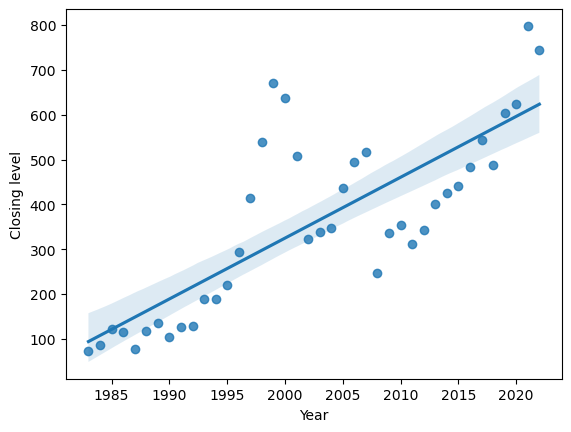

In [9]:
# Plot the 'Year' and 'Closing level' columns

#df_aex.plot(x='Year', y='Closing level');
sns.regplot(x='Year', y='Closing level', data=df_aex);

## Selecting and organizing data <a name="Wk2_b"></a>

### Exploring a dataset

After importing a dataset, __always__ first quickly explore and check it, by at least displaying:
- a sample of rows using the `head()`, `tail()` and `sample()` methods.
- general information about the DataFrame using the `info()` method.  

But examining additional aspects may also be helpful, including:
- the dimensionality using the `shape` attribute.
- the column names using the `columns` attribute.
- summary statistics using the `describe()` method.

In [10]:
# Display a sample of rows

df_aex.head()  # for the first five rows
#df_aex.tail()  # for the last five rows
#df_aex.sample()  # for one random row

,Year,Closing level,Change in index in points,Change in index in %
0,1983,73.21,NaN,NaN
1,1984,85.75,12.54,17.13
2,1985,121.50,35.75,41.69
3,1986,114.69,−6.81,−5.60
4,1987,77.87,−36.82,−32.10


In [11]:
# Display general information

df_aex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       40 non-null     int64  
 1   Closing level              40 non-null     float64
 2   Change in index in points  39 non-null     object 
 3   Change in index in %       39 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [12]:
# Display the dimensionality

df_aex.shape

(40, 4)

In [13]:
# Display the column names

df_aex.columns

Index(['Year', 'Closing level', 'Change in index in points',
       'Change in index in %'],
      dtype='object')

In [14]:
# Display summary statistics

df_aex.describe()

,Year,Closing level
count,40.000000,40.000000
mean,2002.500000,358.736250
std,11.690452,200.285496
min,1983.000000,73.210000
25%,1992.750000,175.140000
50%,2002.500000,345.395000
75%,2012.250000,498.200000
max,2022.000000,797.930000


In [15]:
# Display the DataFrame

df_aex
#display(df_aex)

,Year,Closing level,Change in index in points,Change in index in %
0,1983,73.21,NaN,NaN
1,1984,85.75,12.54,17.13
2,1985,121.50,35.75,41.69
3,1986,114.69,−6.81,−5.60
4,1987,77.87,−36.82,−32.10
5,1988,117.68,39.81,51.12
6,1989,136.59,18.91,16.07
7,1990,104.01,−32.58,−23.85
8,1991,125.72,21.71,20.87
9,1992,129.71,3.99,3.17


### Selecting columns

You can select columns by passing a list of column names to the [ ] bracket operator, by using the pandas-specific data accessors `loc` (selection by label) and `iloc` (selection by position), but also (for example) by including or excluding specific data type(s).

In [16]:
# Select the 'Year' and 'Closing level' columns from df_aex

df_sub = df_aex[['Year', 'Closing level']]
#df_sub = df_aex.loc[:, ['Year', 'Closing level']]
#df_sub = df_aex.iloc[:, [0, 1]]

df_sub.head()

,Year,Closing level
0,1983,73.21
1,1984,85.75
2,1985,121.50
3,1986,114.69
4,1987,77.87


In [17]:
# Select the 'Year' and 'Closing level' columns from df_aex based on data type(s)

df_sub = df_aex.select_dtypes(include=["number"])
#df_sub = df_aex.select_dtypes(exclude=["object"])

df_sub.head()

,Year,Closing level
0,1983,73.21
1,1984,85.75
2,1985,121.50
3,1986,114.69
4,1987,77.87


### Selecting rows

You can select rows by passing a list of row indices to the [ ] bracket operator, by using the pandas-specific data accessors `loc` (selection by label) and `iloc` (selection by position), but also (for example) based on one or multiple condition(s).

In [18]:
# Select the first, third and fifth row from df_aex

df_sub = df_aex[0:5:2]
#df_sub = df_aex.loc[[0, 2, 4], :]
#df_sub = df_aex.iloc[[0, 2, 4], :]

df_sub

,Year,Closing level,Change in index in points,Change in index in %
0,1983,73.21,NaN,NaN
2,1985,121.50,35.75,41.69
4,1987,77.87,−36.82,−32.10


In [19]:
# Select a few rows from df_aex based on multiple conditions

df_sub = df_aex.loc[(df_aex['Year']<=2005) & (df_aex['Closing level']>600)]
#df_sub = df_aex.loc[(df_aex['Year']<=2005) | (df_aex['Closing level']>600)]

df_sub

,Year,Closing level,Change in index in points,Change in index in %
16,1999,671.41,132.96,24.69
17,2000,637.60,−33.81,−5.04


In [20]:
# Select a few rows from df_aex based on multiple conditions (using isin)

# Instead of:
#df_aex.loc[(df_aex['Year'] == 2017) | (df_aex['Year'] == 2018) | (df_aex['Year'] == 2019)]

# You can also use:
df_aex.loc[df_aex['Year'].isin([2017, 2018, 2019])]

,Year,Closing level,Change in index in points,Change in index in %
34,2017,544.58,61.41,12.71
35,2018,487.88,−56.70,−10.41
36,2019,604.58,116.70,23.92


In [21]:
# Select a few rows from df_aex based on multiple conditions (using between)

# Instead of:
#df_aex.loc[(df_aex['Year']>=2017) & (df_aex['Year']<=2019)]

# You can also use:
df_aex.loc[(df_aex['Year'].between(2017, 2019))]

,Year,Closing level,Change in index in points,Change in index in %
34,2017,544.58,61.41,12.71
35,2018,487.88,−56.70,−10.41
36,2019,604.58,116.70,23.92


### Selecting specific cell(s)

You can select one or more specific cell(s) by using the pandas-specific data accessors `loc` (selection by label) and `iloc` (selection by position). Use a list for the rows and/or columns if you want to select multiple cells.

In [22]:
# Select the closing level for the year 1985 from df_aex

#df_sub = df_aex.loc[2, 'Closing level']
df_sub = df_aex.iloc[2, 1]

df_sub

121.5

In [23]:
# Select the closing level for the years 1985 and 1995 from df_aex

#df_sub = df_aex.loc[[2, 12], 'Closing level']
df_sub = df_aex.iloc[[2, 12], 1]

df_sub

# This returns a Series. Let's now select the closing level for the year 1985 from this Series

#df_sub.loc[2]
#df_sub.iloc[0]

2     121.50
12    220.24
Name: Closing level, dtype: float64

### Sorting a dataset

In [24]:
# Sorting a dataset (in ascending and descending order)

df_sub = df_aex.loc[(df_aex['Year']>=2010) & (df_aex['Year']<=2019)]

df_sub[['Year', 'Closing level']].sort_values(by='Closing level', ascending=True)
#df_sub[['Year', 'Closing level']].sort_values(by='Closing level', ascending=False)

,Year,Closing level
28,2011,312.47
29,2012,342.71
27,2010,354.57
30,2013,401.79
31,2014,424.47
32,2015,441.82
33,2016,483.17
35,2018,487.88
34,2017,544.58
36,2019,604.58


## Modifying and/or extending a DataFrame <a name="Wk2_c"></a>

In [25]:
# Import an example dataset (collected using Compustat)

df = pd.read_excel("data/example_2.xlsx")
df

,Global Company Key,Data Year - Fiscal,Ticker Symbol,Company Name,Assets - Total,Net Income (Loss),Auditor,Standard Industry Classification Code
0,1690,2020,AAPL,APPLE INC,323888,57411,4,3663
1,3144,2020,KO,COCA-COLA CO,87296,7747,4,2086
2,4839,2020,F,FORD MOTOR CO,267261,-1279,7,3711
3,5073,2020,GM,GENERAL MOTORS CO,235194,6427,4,3711
4,6066,2020,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370
5,8479,2020,PEP,PEPSICO INC,92918,7120,6,2080
6,12141,2020,MSFT,MICROSOFT CORP,301311,44281,5,7372
7,12142,2020,ORCL,ORACLE CORP,131107,13746,4,7370
8,64768,2020,AMZN,AMAZON.COM INC,321195,21331,4,5961
9,170617,2020,FB,FACEBOOK INC,159316,29146,4,7370


In [26]:
# Display general information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Global Company Key                     10 non-null     int64 
 1   Data Year - Fiscal                     10 non-null     int64 
 2   Ticker Symbol                          10 non-null     object
 3   Company Name                           10 non-null     object
 4   Assets - Total                         10 non-null     int64 
 5   Net Income (Loss)                      10 non-null     int64 
 6   Auditor                                10 non-null     int64 
 7   Standard Industry Classification Code  10 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 768.0+ bytes


#### Renaming columns

In [27]:
# Rename the last six columns

df = df.rename(columns={'Ticker Symbol': 'symbol', 'Company Name': 'company', \
                        'Assets - Total': 'total_assets', 'Net Income (Loss)': 'net_income', \
                        'Auditor': 'auditor', 'Standard Industry Classification Code': 'sic'})
df

,Global Company Key,Data Year - Fiscal,symbol,company,total_assets,net_income,auditor,sic
0,1690,2020,AAPL,APPLE INC,323888,57411,4,3663
1,3144,2020,KO,COCA-COLA CO,87296,7747,4,2086
2,4839,2020,F,FORD MOTOR CO,267261,-1279,7,3711
3,5073,2020,GM,GENERAL MOTORS CO,235194,6427,4,3711
4,6066,2020,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370
5,8479,2020,PEP,PEPSICO INC,92918,7120,6,2080
6,12141,2020,MSFT,MICROSOFT CORP,301311,44281,5,7372
7,12142,2020,ORCL,ORACLE CORP,131107,13746,4,7370
8,64768,2020,AMZN,AMAZON.COM INC,321195,21331,4,5961
9,170617,2020,FB,FACEBOOK INC,159316,29146,4,7370


#### Dropping columns

In [28]:
# Drop the first two columns

df = df.drop(['Global Company Key', 'Data Year - Fiscal'], axis=1)
df

,symbol,company,total_assets,net_income,auditor,sic
0,AAPL,APPLE INC,323888,57411,4,3663
1,KO,COCA-COLA CO,87296,7747,4,2086
2,F,FORD MOTOR CO,267261,-1279,7,3711
3,GM,GENERAL MOTORS CO,235194,6427,4,3711
4,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370
5,PEP,PEPSICO INC,92918,7120,6,2080
6,MSFT,MICROSOFT CORP,301311,44281,5,7372
7,ORCL,ORACLE CORP,131107,13746,4,7370
8,AMZN,AMAZON.COM INC,321195,21331,4,5961
9,FB,FACEBOOK INC,159316,29146,4,7370


#### Setting and resetting the index

In [29]:
# Setting and resetting the index

df.set_index('symbol', inplace=True)
df.reset_index(inplace=True)
df

,symbol,company,total_assets,net_income,auditor,sic
0,AAPL,APPLE INC,323888,57411,4,3663
1,KO,COCA-COLA CO,87296,7747,4,2086
2,F,FORD MOTOR CO,267261,-1279,7,3711
3,GM,GENERAL MOTORS CO,235194,6427,4,3711
4,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370
5,PEP,PEPSICO INC,92918,7120,6,2080
6,MSFT,MICROSOFT CORP,301311,44281,5,7372
7,ORCL,ORACLE CORP,131107,13746,4,7370
8,AMZN,AMAZON.COM INC,321195,21331,4,5961
9,FB,FACEBOOK INC,159316,29146,4,7370


#### Creating new variables

In [30]:
# Create two new continuous variables ('roa' and 'total_assets_ln')

df['roa'] = df['net_income'] / df['total_assets']
df['total_assets_ln'] = np.log(df['total_assets'])
df

,symbol,company,total_assets,net_income,auditor,sic,roa,total_assets_ln
0,AAPL,APPLE INC,323888,57411,4,3663,0.177256,12.688153
1,KO,COCA-COLA CO,87296,7747,4,2086,0.088744,11.377060
2,F,FORD MOTOR CO,267261,-1279,7,3711,-0.004786,12.495981
3,GM,GENERAL MOTORS CO,235194,6427,4,3711,0.027326,12.368166
4,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370,0.035840,11.957425
5,PEP,PEPSICO INC,92918,7120,6,2080,0.076627,11.439473
6,MSFT,MICROSOFT CORP,301311,44281,5,7372,0.146961,12.615898
7,ORCL,ORACLE CORP,131107,13746,4,7370,0.104846,11.783769
8,AMZN,AMAZON.COM INC,321195,21331,4,5961,0.066411,12.679804
9,FB,FACEBOOK INC,159316,29146,4,7370,0.182945,11.978645


In [31]:
# Create two new categorical variables ('manufacturing_firm' and 'loss')

df['manufacturing_firm'] = np.where(df['sic'].between(2000, 3999),1,0)
df['loss'] = [1 if x < 0 else 0 for x in df['net_income']]
df

,symbol,company,total_assets,net_income,auditor,sic,roa,total_assets_ln,manufacturing_firm,loss
0,AAPL,APPLE INC,323888,57411,4,3663,0.177256,12.688153,1,0
1,KO,COCA-COLA CO,87296,7747,4,2086,0.088744,11.377060,1,0
2,F,FORD MOTOR CO,267261,-1279,7,3711,-0.004786,12.495981,1,1
3,GM,GENERAL MOTORS CO,235194,6427,4,3711,0.027326,12.368166,1,0
4,IBM,INTL BUSINESS MACHINES CORP,155971,5590,7,7370,0.035840,11.957425,0,0
5,PEP,PEPSICO INC,92918,7120,6,2080,0.076627,11.439473,1,0
6,MSFT,MICROSOFT CORP,301311,44281,5,7372,0.146961,12.615898,0,0
7,ORCL,ORACLE CORP,131107,13746,4,7370,0.104846,11.783769,0,0
8,AMZN,AMAZON.COM INC,321195,21331,4,5961,0.066411,12.679804,0,0
9,FB,FACEBOOK INC,159316,29146,4,7370,0.182945,11.978645,0,0


#### Replacing values

In [32]:
# Replace the values of the 'auditor' variable

df['auditor'].replace({4: 'EY', 5: 'DTTL', 6: 'KPMG', 7: 'PWC'}, inplace=True)
df

,symbol,company,total_assets,net_income,auditor,sic,roa,total_assets_ln,manufacturing_firm,loss
0,AAPL,APPLE INC,323888,57411,EY,3663,0.177256,12.688153,1,0
1,KO,COCA-COLA CO,87296,7747,EY,2086,0.088744,11.377060,1,0
2,F,FORD MOTOR CO,267261,-1279,PWC,3711,-0.004786,12.495981,1,1
3,GM,GENERAL MOTORS CO,235194,6427,EY,3711,0.027326,12.368166,1,0
4,IBM,INTL BUSINESS MACHINES CORP,155971,5590,PWC,7370,0.035840,11.957425,0,0
5,PEP,PEPSICO INC,92918,7120,KPMG,2080,0.076627,11.439473,1,0
6,MSFT,MICROSOFT CORP,301311,44281,DTTL,7372,0.146961,12.615898,0,0
7,ORCL,ORACLE CORP,131107,13746,EY,7370,0.104846,11.783769,0,0
8,AMZN,AMAZON.COM INC,321195,21331,EY,5961,0.066411,12.679804,0,0
9,FB,FACEBOOK INC,159316,29146,EY,7370,0.182945,11.978645,0,0


### Converting between various data types

The data type that is stored in a column determines the operations you can perform on the data found in that column. It is therefore important to know how to convert between data types. The two main methods for doing this are:
- The `astype()` method, which is a generic function that can be used to convert any data type to another data type.
- The `to_numeric()` method, which can also be used when converting a column into a numeric data type, but which handles non-numeric values better. For example, it may be the case that a numeric column contains strings as some of its values (e.g., the string 'missing' or 'null' to represent missing values). In such cases, using the `astype()` method to convert the column into a numeric data type may cause an error. The `to_numeric()` method has a parameter called 'errors', however, that determines what happens when the function encounters a value that it is unable to convert to a numeric value. This parameter has three possible values:  
1) 'raise' (which is the default) will raise an error if it cannot convert all values to numeric values.  
2) 'coerce' will return 'NaN' for values it cannot convert to numeric values.  
3) 'ignore' will return the vector without converting the column into a numeric data type (i.e., it will do nothing).  

Using the `to_numeric()` method and passing in the 'coerce' value may therefore be the solution when you know a column must contain numeric values, but for some reason the data include non-numeric values.

In [33]:
# Display data types

df.dtypes

symbol                 object
company                object
total_assets            int64
net_income              int64
auditor                object
sic                     int64
roa                   float64
total_assets_ln       float64
manufacturing_firm      int32
loss                    int64
dtype: object

In [34]:
# Convert data type of the 'sic' variable to string (object)

df['sic'] = df['sic'].astype(str)
df.dtypes

symbol                 object
company                object
total_assets            int64
net_income              int64
auditor                object
sic                    object
roa                   float64
total_assets_ln       float64
manufacturing_firm      int32
loss                    int64
dtype: object

### Working with dates and times

A topic that won't be discussed in this course is working with dates and time, even though both Python (see https://docs.python.org/3/library/datetime.html) as well as pandas ((see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html?highlight=datetime) have a lot of functionalities that have to do with dates and time.

When we do work with dates in this course, we will treat them as strings (we may have to tell Python to treat them as a string by using the `astype(str)` method), which can then be sliced. Here are some examples of this.

In [35]:
# Create an example DataFrame

df = pd.DataFrame({'date': ['2002-04-16', '2004-04-17', '2004-04-28'],
                   'amount': [12000, 12500, 15000]})
df['date'] = pd.to_datetime(df['date'])
display(df)

,date,amount
0,2002-04-16,12000
1,2004-04-17,12500
2,2004-04-28,15000


In [36]:
# Display general information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   amount  3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [37]:
# Using slicing to obtain the year, month and day

df['year'] = df['date'].astype(str).str[0:4]
df['month'] = df['date'].astype(str).str[5:7]
df['day'] = df['date'].astype(str).str[8:10]
display(df)

,date,amount,year,month,day
0,2002-04-16,12000,2002,04,16
1,2004-04-17,12500,2004,04,17
2,2004-04-28,15000,2004,04,28


In [38]:
# Using the split() method to obtain the year, month and day

df[['year', 'month', 'day']] = df['date'].astype(str).str.split('-', expand=True)
display(df)

# But always be careful when using this method for this purpose!

#df[['day', 'month', 'year']] = df['date'].astype(str).str.split('-', expand=True)
#display(df)

,date,amount,year,month,day
0,2002-04-16,12000,2002,04,16
1,2004-04-17,12500,2004,04,17
2,2004-04-28,15000,2004,04,28


## Identifying and dealing with missing values <a name="Wk2_d"></a>

Before starting any analysis, you need to know the number of missing values for each variable, and why those values are missing. You also need good strategies for dealing with missing values before you begin statistical modeling, because those models do not typically handle missing values flexibly.

In [39]:
# Create an example DataFrame

df = pd.DataFrame({'constituent': ['Apple Inc.', 'Apple Inc.', 'Microsoft Corp', \
                                   'Microsoft Corp', 'Amazon.com Inc.', 'Amazon.com Inc.'],
                   'symbol': ['AAPL', 'AAPL', 'MSFT', np.NaN, 'AMZN', 'AMZN'],
                   'year': [2019, 2020, 2019, 2020, 2019, 2020],
                   'net income': [55.3, 57.4, np.NaN, 44.3, np.NaN, 21.3]})
df

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,NaN
3,Microsoft Corp,NaN,2020,44.3
4,Amazon.com Inc.,AMZN,2019,NaN
5,Amazon.com Inc.,AMZN,2020,21.3


In [40]:
# Identify the number of missing values

df.isna().sum()  # number of missing values per column
#df.isna().sum(axis=1)  # number of missing values per row
#df.isna().sum(axis=1).value_counts()  # number of rows with ...

constituent    0
symbol         1
year           0
net income     2
dtype: int64

In [41]:
# Dealing with the missing value for 'symbol' - step 1

df[df['symbol'].isna()]

,constituent,symbol,year,net income
3,Microsoft Corp,NaN,2020,44.3


In [42]:
# Dealing with the missing value for 'symbol' - step 2

df[df['constituent'] == 'Microsoft Corp']

,constituent,symbol,year,net income
2,Microsoft Corp,MSFT,2019,NaN
3,Microsoft Corp,NaN,2020,44.3


In [43]:
# Dealing with the missing value for 'symbol' - step 3

df.loc[3, 'symbol'] = 'MSFT'
df

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,NaN
3,Microsoft Corp,MSFT,2020,44.3
4,Amazon.com Inc.,AMZN,2019,NaN
5,Amazon.com Inc.,AMZN,2020,21.3


In [44]:
# Use listwise deletion to deal with the missing values

df1 = df.dropna()
df1

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
3,Microsoft Corp,MSFT,2020,44.3
5,Amazon.com Inc.,AMZN,2020,21.3


In [45]:
# Use mean imputation to deal with the missing values

df2 = df.fillna(df.mean())
df2

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.300
1,Apple Inc.,AAPL,2020,57.400
2,Microsoft Corp,MSFT,2019,44.575
3,Microsoft Corp,MSFT,2020,44.300
4,Amazon.com Inc.,AMZN,2019,44.575
5,Amazon.com Inc.,AMZN,2020,21.300


In [46]:
# Use multiple solutions to deal with the missing values

df3 = df.fillna({'net income': df['net income'].mean()}).dropna()
df3

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.300
1,Apple Inc.,AAPL,2020,57.400
2,Microsoft Corp,MSFT,2019,44.575
3,Microsoft Corp,MSFT,2020,44.300
4,Amazon.com Inc.,AMZN,2019,44.575
5,Amazon.com Inc.,AMZN,2020,21.300


## Applying custom functions <a name="Wk2_e"></a>

Learning about the `apply()` method is fundamental for the data cleaning process. This method takes a function and "applies" (i.e., runs) it across each row or column of a DataFrame "simultaneously". You can apply custom functions this way to any DataFrame column, regardless of its data type. However, when defining a custom function, you need to be mindful of the values you want to apply it to. Also, in some situations, applying a custom function to a DataFrame column raises an error, which is then typically due to the column containing 'NaN' values in combination with the custom function using a method that is not applicable for 'NaN' values. In such cases, it may be necessary to define the custom function such that it handles these 'NaN' values explicitly.

In [47]:
# Create an example DataFrame

df = pd.DataFrame({'col1': [1, 2, 3],
                   'col2': [4, np.NaN, np.NaN],
                   'col3': [7, 8, np.NaN]})
df

,col1,col2,col3
0,1,4.0,7.0
1,2,NaN,8.0
2,3,NaN,NaN


In [48]:
# Create a first custom function

def my_sq(x):
    return x ** 2

In [49]:
# Apply the function to the first column

df['col1'].apply(my_sq)  # Note that you don't need to add the parentheses () when you pass the function into apply

0    1
1    4
2    9
Name: col1, dtype: int64

In [50]:
# Apply the function to the first row (possible but not common)

df.iloc[0].apply(my_sq)

col1     1.0
col2    16.0
col3    49.0
Name: 0, dtype: float64

In [51]:
# Create a second custom function

def my_exp(x, e):
    return x ** e

In [52]:
# Apply the function to the first column

df['col1'].apply(my_exp, e=3)  # Pass in the second argument as a keyword argument

0     1
1     8
2    27
Name: col1, dtype: int64

In [53]:
# Apply the function to the second column

df['col2'].apply(my_exp, e=3)  # Note that here the 'NaN' value does not raise an error

0    64.0
1     NaN
2     NaN
Name: col2, dtype: float64

In [54]:
# Create a third custom function

def count_missing(vec):
    null_vec = pd.isna(vec)
    null_count = np.sum(null_vec)
    return null_count

In [55]:
# Apply the function to the columns

df.apply(count_missing)  # Adding 'axis=0' is not necessary because this is the default

col1    0
col2    2
col3    1
dtype: int64

In [56]:
# Apply the function to the rows

df.apply(count_missing, axis=1)

0    0
1    1
2    2
dtype: int64

### Applying anonymous (or `lambda`) functions

Sometimes the function used in the `apply()` method is simple enough (i.e., a one-liner) that there is no need to create a separate function. Usually when this happens, analysts will opt to write the one-liner directly in the `apply()` method by applying an anonymous (or `lambda`) function. You define anonymous functions using the `lambda` keyword. After `lambda`, you need to specify a parameter name followed by a colon and a return value. Although you can write complex multiple-line `lambda` functions, typically analysts will use the `lambda` function approach when small one-line calculations are needed. The code can become hard to read if the `lambda` function tries to do too much at once.

In [57]:
# Example of applying a simple lambda function

df.apply(lambda x: x + 100)

,col1,col2,col3
0,101,104.0,107.0
1,102,NaN,108.0
2,103,NaN,NaN


In [58]:
# Example of applying a more complex lambda function

df.apply(lambda x: x.astype(str).replace('nan', 'MISSING'))

,col1,col2,col3
0,1,4.0,7.0
1,2,MISSING,8.0
2,3,MISSING,MISSING


## Groupby operations: split-apply-combine <a name="Wk2_f"></a>

In most data analytics projects, in addition to performing operations (such as generating summary statistics) on a whole DataFrame, analysts also will have to perform such operations on groups that are defined by one or more categorical variable(s). Grouped operations are a powerful way to aggregate, transform, and filter data. They rely on the mantra of "split-apply-combine":
1. Data is split into separate parts based on key(s).
2. A function is applied to each part of the data.
3. The results from each part are combined to create a new dataset.  

This is a powerful concept because parts of the original data can be split up into independent parts to perfom a calculation. The `groupby()` method of the pandas library is typically used to accomplish grouped operations.

There are at least two specialized methods available on the pandas DataFrame groupby object that you can use to compute group summary statistics and/or to perform other group operations:
- The `agg()` (or `aggregate()`) method, which produces a single value from each group of rows (e.g., the sum of a column for each group). The `agg` group method allows you to apply built-in aggregating functions (e.g., sum) as well as custom aggregating functions to your data.
- The `apply()` method, which you can use to manipulate each group independently in several ways, including filtering out groups based on a group value (e.g., filtering out groups that have only one row) or transforming columns based on a group statistic (e.g., dividing each value in a column by the sum of that column, for each group separately).

#### Using the `agg()` (or `aggregate()`) method

In [59]:
# Create an example DataFrame

df = pd.DataFrame({'symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT', 'AMZN', 'AMZN'],
                   'year': [2019, 2020, 2019, 2020, 2019, 2020],
                   'net income': [55.3, 57.4, 39.2, 44.3, 11.6, 21.3]})
display(df)
print(df.shape)

,symbol,year,net income
0,AAPL,2019,55.3
1,AAPL,2020,57.4
2,MSFT,2019,39.2
3,MSFT,2020,44.3
4,AMZN,2019,11.6
5,AMZN,2020,21.3


(6, 3)


In [60]:
# Using the agg() group method to apply built-in aggregating functions

df.groupby('symbol')['net income'].agg(['sum', 'mean', 'size'])  # using a list
#df.groupby('symbol').agg({'net income': ['sum', 'mean', 'size']})  # using a dictionary

,sum,mean,size
symbol,,,
AAPL,112.7,56.35,2
AMZN,32.9,16.45,2
MSFT,83.5,41.75,2


In [61]:
# Using the agg() group method to apply a custom aggregating function

def diff(column):
    return column.max() - column.min()

df.groupby('symbol')['net income'].agg(['max', 'min', diff])  # using a list
#df.groupby('symbol').agg({'net income': ['max', 'min', diff]})  # using a dictionary

,max,min,diff
symbol,,,
AAPL,57.4,55.3,2.1
AMZN,21.3,11.6,9.7
MSFT,44.3,39.2,5.1


#### Using the `apply()` method

In [62]:
# Using the apply() method to select groups of rows that meet a certain group-level condition

def filter_group(df_group):
    return df_group if df_group['net income'].sum() > 80 else None

df.groupby('symbol').apply(filter_group)

#df.groupby('symbol')['net income'].filter(lambda x: x.sum() > 80)

symbol  year  net income
symbol                           
AAPL   0   AAPL  2019        55.3
       1   AAPL  2020        57.4
MSFT   2   MSFT  2019        39.2
       3   MSFT  2020        44.3

In [63]:
# Using the apply() method to transform values in a group based on a group statistic

def percent_group_total(df_group):
    df_group['% group net income'] = (df_group['net income'] / df_group['net income'].sum() * 100).round(2)
    return df_group

df.groupby('symbol').apply(percent_group_total)

#df.groupby('symbol')['net income'].transform(lambda x: (x / (x.sum()) * 100))

,symbol,year,net income,% group net income
0,AAPL,2019,55.3,49.07
1,AAPL,2020,57.4,50.93
2,MSFT,2019,39.2,46.95
3,MSFT,2020,44.3,53.05
4,AMZN,2019,11.6,35.26
5,AMZN,2020,21.3,64.74


## Combining DataFrames <a name="Wk2_g"></a>

During most data analytics projects, analysts will have to combine data from different data tables. This involves either appending data with the same structure to existing data rows or doing a merge to retrieve columns from a different data table. The former is sometimes referred to as combining data vertically, or concatenating, while the latter is referred to as combining data horizontally, or merging.

### Combining DataFrames vertically

The `concat()` method of the pandas library can be used for row-wise or column-wise concatenation of DataFrame or Series objects. Row-wise concatenation is the pandas equivalent of copying rows from one spreadsheet and pasting them at the bottom of another. Column-wise concatenation works similarly, except that the rows are pasted next to each other. (Just add the axis='columns' keyword argument. Try it!)

In [64]:
# Create two example DataFrames (with the same set of columns)

df1 = pd.DataFrame({'constituent': ['Apple Inc.', 'Microsoft Corp'],
                    'symbol': ['AAPL', 'MSFT'],
                    'sector': ['Information Technology', 'Information Technology']})
df2 = pd.DataFrame({'constituent': ['Amazon.com Inc.', 'Tesla, Inc'],
                    'symbol': ['AMZN', 'TSLA'],
                    'sector': ['Consumer Discretionary', 'Consumer Discretionary']})
display(df1)
print(df1.shape)
display(df2)
print(df2.shape)

,constituent,symbol,sector
0,Apple Inc.,AAPL,Information Technology
1,Microsoft Corp,MSFT,Information Technology


(2, 3)


,constituent,symbol,sector
0,Amazon.com Inc.,AMZN,Consumer Discretionary
1,"Tesla, Inc",TSLA,Consumer Discretionary


(2, 3)


In [65]:
# Row-wise concatenation, without the ignore_index=True keyword argument

df_conc1 = pd.concat([df1, df2])
display(df_conc1)
print(df_conc1.shape)

,constituent,symbol,sector
0,Apple Inc.,AAPL,Information Technology
1,Microsoft Corp,MSFT,Information Technology
0,Amazon.com Inc.,AMZN,Consumer Discretionary
1,"Tesla, Inc",TSLA,Consumer Discretionary


(4, 3)


In [66]:
# Row-wise concatenation, but with the ignore_index=True keyword argument

df_conc2 = pd.concat([df1, df2], ignore_index=True)
display(df_conc2)
print(df_conc2.shape)

,constituent,symbol,sector
0,Apple Inc.,AAPL,Information Technology
1,Microsoft Corp,MSFT,Information Technology
2,Amazon.com Inc.,AMZN,Consumer Discretionary
3,"Tesla, Inc",TSLA,Consumer Discretionary


(4, 3)


In [67]:
# Create two example DataFrames (with different columns)

df1 = pd.DataFrame({'constituent': ['Apple Inc.', 'Microsoft Corp'],
                    'symbol': ['AAPL', 'MSFT'],
                    'sector': ['Information Technology', 'Information Technology']})
df2 = pd.DataFrame({'constituent': ['Amazon.com Inc.', 'Tesla, Inc'],
                    'symbol': ['AMZN', 'TSLA'],
                    'profits': [22, 45]})
display(df1)
print(df1.shape)
display(df2)
print(df2.shape)

,constituent,symbol,sector
0,Apple Inc.,AAPL,Information Technology
1,Microsoft Corp,MSFT,Information Technology


(2, 3)


,constituent,symbol,profits
0,Amazon.com Inc.,AMZN,22
1,"Tesla, Inc",TSLA,45


(2, 3)


In [68]:
# Row-wise concatenation, without the join='inner' keyword argument

df_conc3 = pd.concat([df1, df2], ignore_index=True)
display(df_conc3)
print(df_conc3.shape)

,constituent,symbol,sector,profits
0,Apple Inc.,AAPL,Information Technology,NaN
1,Microsoft Corp,MSFT,Information Technology,NaN
2,Amazon.com Inc.,AMZN,NaN,22.0
3,"Tesla, Inc",TSLA,NaN,45.0


(4, 4)


In [69]:
# Row-wise concatenation, but with the join='inner' keyword argument

df_conc4 = pd.concat([df1, df2], join='inner', ignore_index=True)
display(df_conc4)
print(df_conc4.shape)

,constituent,symbol
0,Apple Inc.,AAPL
1,Microsoft Corp,MSFT
2,Amazon.com Inc.,AMZN
3,"Tesla, Inc",TSLA


(4, 2)


Instead of using `concat()`, you can also use the `append()` method to add rows or columns to an existing DataFrame. Using `concat()` is faster and more flexible, and therefore typically the better option. The `append()` method can sometimes be useful, however, e.g. to add a (sub)total row to a DataFrame.

In [70]:
# Create an example DataFrame

df = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar'],
                   'Sales revenues': [25000, 27500, 28000]})
df

,Month,Sales revenues
0,Jan,25000
1,Feb,27500
2,Mar,28000


In [71]:
# Using the append() method to add a (sub)total row

df_app = df.append({'Month': '1st Quarter',
                    'Sales revenues': df['Sales revenues'].sum()}, ignore_index=True)
df_app

,Month,Sales revenues
0,Jan,25000
1,Feb,27500
2,Mar,28000
3,1st Quarter,80500


### Combining DataFrames horizontally

Although there are alternatives (such as the `join()` method), the `merge()` method of the pandas library is typically used to combine data from different data tables into a single DataFrame, based on the values in one or more of the columns they have in common. Merging data tables is the pandas equivalent of the VLOOKUP function (or its alternatives) that can be used to conditionally join tables in Excel.

When deciding on how to merge two data tables, there are essentially two critical issues, namely:
1) Whether the values in the column(s) based on which you merge the two data tables are all unique or whether there are also duplicates in one or both of the tables. This determines whether you are doing a one-to-one merge (when there are no duplicates in either table), a one-to-many merge (when there are duplicates in the right table), a many-to-one merge (when there are duplicates in the left table), or a many-to-many merge (when there are duplicates in both tables).  
2) Whether the values in the column(s) based on which you merge the two data tables are all the same or whether there are also different values (i.e., whether these values completely overlap or not). Depending on how you want to deal with this issue, you can then do an inner merge (where you only keep the rows with the same values in both tables in the output), an outer merge (where you also keep the rows with different values in both tables in the output), a left merge (where you keep all rows from the left table in the output), or a right merge (where you keep all rows from the right table in the output).

#### Doing a one-to-one merge

In [72]:
# Create two example DataFrames

df_left = pd.DataFrame({'constituent': ['Apple Inc.', 'Microsoft Corp', 'Amazon.com Inc.', 'Tesla, Inc'],
                        'symbol': ['AAPL', 'MSFT', 'AMZN', 'TSLA']})
df_right = pd.DataFrame({'symbol': ['AAPL', 'MSFT', 'AMZN'],
                         'sector': ['Information Technology', 'Information Technology', 'Consumer Discretionary'],
                         'net income': [57.4, 44.3, 21.3]})
display(df_left)
print(df_left.shape)
display(df_right)
print(df_right.shape)

,constituent,symbol
0,Apple Inc.,AAPL
1,Microsoft Corp,MSFT
2,Amazon.com Inc.,AMZN
3,"Tesla, Inc",TSLA


(4, 2)


,symbol,sector,net income
0,AAPL,Information Technology,57.4
1,MSFT,Information Technology,44.3
2,AMZN,Consumer Discretionary,21.3


(3, 3)


In [73]:
# Doing a one-to-one 'inner' merge (which is the default)

df_oto1 = pd.merge(df_left, df_right, on=['symbol'], how="inner")
display(df_oto1)
print(df_oto1.shape)

,constituent,symbol,sector,net income
0,Apple Inc.,AAPL,Information Technology,57.4
1,Microsoft Corp,MSFT,Information Technology,44.3
2,Amazon.com Inc.,AMZN,Consumer Discretionary,21.3


(3, 4)


In [74]:
# Doing a one-to-one 'outer' merge

df_oto2 = pd.merge(df_left, df_right, on=['symbol'], how="outer")
display(df_oto2)
print(df_oto2.shape)

,constituent,symbol,sector,net income
0,Apple Inc.,AAPL,Information Technology,57.4
1,Microsoft Corp,MSFT,Information Technology,44.3
2,Amazon.com Inc.,AMZN,Consumer Discretionary,21.3
3,"Tesla, Inc",TSLA,NaN,NaN


(4, 4)


In [75]:
# Doing a one-to-one 'left' merge

df_oto3 = pd.merge(df_left, df_right, on=['symbol'], how="left")
display(df_oto3)
print(df_oto3.shape)

,constituent,symbol,sector,net income
0,Apple Inc.,AAPL,Information Technology,57.4
1,Microsoft Corp,MSFT,Information Technology,44.3
2,Amazon.com Inc.,AMZN,Consumer Discretionary,21.3
3,"Tesla, Inc",TSLA,NaN,NaN


(4, 4)


In [76]:
# Doing a one-to-one 'right' merge

df_oto4 = pd.merge(df_left, df_right, on=['symbol'], how="right")
display(df_oto4)
print(df_oto4.shape)

,constituent,symbol,sector,net income
0,Apple Inc.,AAPL,Information Technology,57.4
1,Microsoft Corp,MSFT,Information Technology,44.3
2,Amazon.com Inc.,AMZN,Consumer Discretionary,21.3


(3, 4)


#### Doing a one-to-many merge

In [77]:
# Create two example DataFrames

df_left = pd.DataFrame({'constituent': ['Apple Inc.', 'Microsoft Corp', 'Amazon.com Inc.', 'Tesla, Inc'],
                        'symbol': ['AAPL', 'MSFT', 'AMZN', 'TSLA']})
df_right = pd.DataFrame({'symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT', 'AMZN', 'AMZN'],
                         'year': [2019, 2020, 2019, 2020, 2019, 2020],
                         'net income': [55.3, 57.4, 39.2, 44.3, 11.6, 21.3]})
display(df_left)
print(df_left.shape)
display(df_right)
print(df_right.shape)

,constituent,symbol
0,Apple Inc.,AAPL
1,Microsoft Corp,MSFT
2,Amazon.com Inc.,AMZN
3,"Tesla, Inc",TSLA


(4, 2)


,symbol,year,net income
0,AAPL,2019,55.3
1,AAPL,2020,57.4
2,MSFT,2019,39.2
3,MSFT,2020,44.3
4,AMZN,2019,11.6
5,AMZN,2020,21.3


(6, 3)


In [78]:
# Doing a one-to-many 'inner' merge (which is the default)

df_otm1 = pd.merge(df_left, df_right, on=['symbol'], how="inner")
display(df_otm1)
print(df_otm1.shape)

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,39.2
3,Microsoft Corp,MSFT,2020,44.3
4,Amazon.com Inc.,AMZN,2019,11.6
5,Amazon.com Inc.,AMZN,2020,21.3


(6, 4)


In [79]:
# Doing a one-to-many 'outer' merge

df_otm2 = pd.merge(df_left, df_right, on=['symbol'], how="outer")
display(df_otm2)
print(df_otm2.shape)

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019.0,55.3
1,Apple Inc.,AAPL,2020.0,57.4
2,Microsoft Corp,MSFT,2019.0,39.2
3,Microsoft Corp,MSFT,2020.0,44.3
4,Amazon.com Inc.,AMZN,2019.0,11.6
5,Amazon.com Inc.,AMZN,2020.0,21.3
6,"Tesla, Inc",TSLA,NaN,NaN


(7, 4)


In [80]:
# Doing a one-to-many 'left' merge

df_otm3 = pd.merge(df_left, df_right, on=['symbol'], how="left")
display(df_otm3)
print(df_otm3.shape)

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019.0,55.3
1,Apple Inc.,AAPL,2020.0,57.4
2,Microsoft Corp,MSFT,2019.0,39.2
3,Microsoft Corp,MSFT,2020.0,44.3
4,Amazon.com Inc.,AMZN,2019.0,11.6
5,Amazon.com Inc.,AMZN,2020.0,21.3
6,"Tesla, Inc",TSLA,NaN,NaN


(7, 4)


In [81]:
# Doing a one-to-many 'right' merge

df_otm4 = pd.merge(df_left, df_right, on=['symbol'], how="right")
display(df_otm4)
print(df_otm4.shape)

,constituent,symbol,year,net income
0,Apple Inc.,AAPL,2019,55.3
1,Apple Inc.,AAPL,2020,57.4
2,Microsoft Corp,MSFT,2019,39.2
3,Microsoft Corp,MSFT,2020,44.3
4,Amazon.com Inc.,AMZN,2019,11.6
5,Amazon.com Inc.,AMZN,2020,21.3


(6, 4)


#### Doing a many-to-many merge

In [82]:
# Create two example DataFrames

df_left = pd.DataFrame({'constituent': ['Apple Inc.', 'Apple Inc.', 'Microsoft Corp', 'Microsoft Corp'],
                        'symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT'],
                        'TMT members': [ 'Tim Cook', 'Luca Maestri', 'Satya Nadella', 'Amy Hood']})
df_right = pd.DataFrame({'symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT', 'AMZN', 'AMZN'],
                         'year': [2019, 2020, 2019, 2020, 2019, 2020],
                         'net income': [55.3, 57.4, 39.2, 44.3, 11.6, 21.3]})
display(df_left)
print(df_left.shape)
display(df_right)
print(df_right.shape)

,constituent,symbol,TMT members
0,Apple Inc.,AAPL,Tim Cook
1,Apple Inc.,AAPL,Luca Maestri
2,Microsoft Corp,MSFT,Satya Nadella
3,Microsoft Corp,MSFT,Amy Hood


(4, 3)


,symbol,year,net income
0,AAPL,2019,55.3
1,AAPL,2020,57.4
2,MSFT,2019,39.2
3,MSFT,2020,44.3
4,AMZN,2019,11.6
5,AMZN,2020,21.3


(6, 3)


In [83]:
# Doing a many-to-many 'inner' merge (which is the default)

df_mtm1 = pd.merge(df_left, df_right, on=['symbol'], how="inner")
display(df_mtm1)
print(df_mtm1.shape)

,constituent,symbol,TMT members,year,net income
0,Apple Inc.,AAPL,Tim Cook,2019,55.3
1,Apple Inc.,AAPL,Tim Cook,2020,57.4
2,Apple Inc.,AAPL,Luca Maestri,2019,55.3
3,Apple Inc.,AAPL,Luca Maestri,2020,57.4
4,Microsoft Corp,MSFT,Satya Nadella,2019,39.2
5,Microsoft Corp,MSFT,Satya Nadella,2020,44.3
6,Microsoft Corp,MSFT,Amy Hood,2019,39.2
7,Microsoft Corp,MSFT,Amy Hood,2020,44.3


(8, 5)


In [84]:
# Doing a many-to-many 'outer' merge

df_mtm2 = pd.merge(df_left, df_right, on=['symbol'], how="outer")
display(df_mtm2)
print(df_mtm2.shape)

,constituent,symbol,TMT members,year,net income
0,Apple Inc.,AAPL,Tim Cook,2019,55.3
1,Apple Inc.,AAPL,Tim Cook,2020,57.4
2,Apple Inc.,AAPL,Luca Maestri,2019,55.3
3,Apple Inc.,AAPL,Luca Maestri,2020,57.4
4,Microsoft Corp,MSFT,Satya Nadella,2019,39.2
5,Microsoft Corp,MSFT,Satya Nadella,2020,44.3
6,Microsoft Corp,MSFT,Amy Hood,2019,39.2
7,Microsoft Corp,MSFT,Amy Hood,2020,44.3
8,NaN,AMZN,NaN,2019,11.6
9,NaN,AMZN,NaN,2020,21.3


(10, 5)


In [85]:
# Doing a many-to-many 'left' merge

df_mtm3 = pd.merge(df_left, df_right, on=['symbol'], how="left")
display(df_mtm3)
print(df_mtm3.shape)

,constituent,symbol,TMT members,year,net income
0,Apple Inc.,AAPL,Tim Cook,2019,55.3
1,Apple Inc.,AAPL,Tim Cook,2020,57.4
2,Apple Inc.,AAPL,Luca Maestri,2019,55.3
3,Apple Inc.,AAPL,Luca Maestri,2020,57.4
4,Microsoft Corp,MSFT,Satya Nadella,2019,39.2
5,Microsoft Corp,MSFT,Satya Nadella,2020,44.3
6,Microsoft Corp,MSFT,Amy Hood,2019,39.2
7,Microsoft Corp,MSFT,Amy Hood,2020,44.3


(8, 5)


In [86]:
# Doing a many-to-many 'right' merge

df_mtm4 = pd.merge(df_left, df_right, on=['symbol'], how="right")
display(df_mtm4)
print(df_mtm4.shape)

,constituent,symbol,TMT members,year,net income
0,Apple Inc.,AAPL,Tim Cook,2019,55.3
1,Apple Inc.,AAPL,Luca Maestri,2019,55.3
2,Apple Inc.,AAPL,Tim Cook,2020,57.4
3,Apple Inc.,AAPL,Luca Maestri,2020,57.4
4,Microsoft Corp,MSFT,Satya Nadella,2019,39.2
5,Microsoft Corp,MSFT,Amy Hood,2019,39.2
6,Microsoft Corp,MSFT,Satya Nadella,2020,44.3
7,Microsoft Corp,MSFT,Amy Hood,2020,44.3
8,NaN,AMZN,NaN,2019,11.6
9,NaN,AMZN,NaN,2020,21.3


(10, 5)


__Some important additional possibilities (see also: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html):__
- It is also possible to explicitly state which DataFrame is the left one and which is the right one. For example:
```python
df_oto1 = pd.merge(right=df_right, left=df_left, on=['symbol'], how="inner")
```
- It is also possible to merge based on columns with different names. For example:
```python
df_oto1 = pd.merge(df_left, df_right, left_on=['SYMBOL'], right_on=['symbol'], how="inner")
```
- It is also possible to merge based on multiple columns. For example:
```python
df_oto1 = pd.merge(df_left, df_right, on=[['constituent', 'symbol']], how="inner")
```
- It is very important to check afterwards whether the merge has been done correctly. Two features that may be helpful here are:  
1) Using the `indicator` keyword argument. This will add a column to the output DataFrame called “_merge” with information on the source of each row. The column can be given a different name by providing a string argument (e.g., indicator='Source').  
2) Using the `validate` keyword argument to tell pandas what kind of merge ('one_to_one', 'one_to_many', 'many_to_one' or 'many_to_many') you are expecting. If the actual situation is different from what you expect, you will get an error.

## Reshaping and pivoting a DataFrame <a name="Wk2_h"></a>

There are a number of basic operations for rearranging a DataFrame. These are alternatingly referred to as *reshape* or *pivot* operations.

### Reshaping with hierarchical indexing

Hierarchical indexing provides a consistent way to rearrange data in a DataFrame. There are two primary actions:
- Stacking, which "rotates" or pivots from the columns into the rows. Using the `stack()` method produces a hierarchically indexed Series.
- Unstacking, which "rotates" or pivots from the rows into the columns. Using the `unstack()` method rearranges the data back from a hierarchically indexed Series into a DataFrame.

In [87]:
# Create an example DataFrame

df = pd.DataFrame({'symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT', 'AMZN', 'AMZN'],
                   'year': [2019, 2020, 2019, 2020, 2019, 2020],
                   'net income': [55.3, 57.4, 39.2, 44.3, 11.6, 21.3]})
display(df)
print(df.shape)

,symbol,year,net income
0,AAPL,2019,55.3
1,AAPL,2020,57.4
2,MSFT,2019,39.2
3,MSFT,2020,44.3
4,AMZN,2019,11.6
5,AMZN,2020,21.3


(6, 3)


In [88]:
# Using the stack() method

df_stacked = df.stack()
df_stacked

0  symbol        AAPL
   year          2019
   net income    55.3
1  symbol        AAPL
   year          2020
   net income    57.4
2  symbol        MSFT
   year          2019
   net income    39.2
3  symbol        MSFT
   year          2020
   net income    44.3
4  symbol        AMZN
   year          2019
   net income    11.6
5  symbol        AMZN
   year          2020
   net income    21.3
dtype: object

In [89]:
# Using the unstack() method

df_unstacked = df_stacked.unstack()
df_unstacked

,symbol,year,net income
0,AAPL,2019,55.3
1,AAPL,2020,57.4
2,MSFT,2019,39.2
3,MSFT,2020,44.3
4,AMZN,2019,11.6
5,AMZN,2020,21.3


### Pivot tables

A widely used feature of Excel are pivot tables, which basically are another way of reshaping a dataset from a long to a wide format. The `pivot_table()` method of the pandas library offers the same functionality. In order to explain how this method works, I will now first pivot a DataFrame using the `groupby()`, `agg()` and `unstack()` methods, before showing you how to
get the same result with pandas’s `pivot_table()` method.

In [90]:
# Import the 'tips' dataset (from the seaborn library)

df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
# Display general information

df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [92]:
# Pivot the DataFrame using the groupby(), agg() and unstack() methods

df_tips.groupby(['day', 'time']).agg({'total_bill': 'mean'}).unstack()

total_bill           
time      Lunch     Dinner
day                       
Thur  17.664754  18.780000
Fri   12.845714  19.663333
Sat         NaN  20.441379
Sun         NaN  21.410000

In [93]:
# Pivot the DataFrame using the pivot_table() method

pd.pivot_table(df_tips, index='day', columns='time', values='total_bill', aggfunc='mean')

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


Something you can easily do with `pivot_table()` — and less so with the "groupby-agg-unstack" approach — is add both row-wise and column-wise totals to the output table by passing the margins and margins_name keyword arguments.

In [94]:
# Pivot the DataFrame using the pivot_table() method (with row-wise and column-wise totals)

pd.pivot_table(df_tips, index='day', columns='time', values='total_bill', aggfunc='mean', margins=True, margins_name='AVERAGE')

time,Lunch,Dinner,AVERAGE
day,,,
Thur,17.664754,18.780000,17.682742
Fri,12.845714,19.663333,17.151579
Sat,NaN,20.441379,20.441379
Sun,NaN,21.410000,21.410000
AVERAGE,17.168676,20.797159,19.785943
